In [1]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt

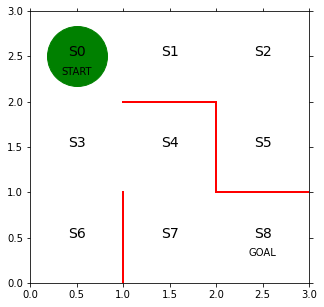

In [2]:
# 初期位置での迷路の様子b

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1,1],[0,1],color='red',linewidth=2)
plt.plot([1,2],[2,2],color='red',linewidth=2)
plt.plot([2,2],[2,1],color='red',linewidth=2)
plt.plot([2,3],[1,1],color='red',linewidth=2)

# 状態を示す文字50~58を描く
plt.text(0.5, 2.5, 'S0',size=14,ha='center')
plt.text(1.5, 2.5, 'S1',size=14,ha='center')
plt.text(2.5, 2.5, 'S2',size=14,ha='center')
plt.text(0.5, 1.5, 'S3',size=14,ha='center')
plt.text(1.5, 1.5, 'S4',size=14,ha='center')
plt.text(2.5, 1.5, 'S5',size=14,ha='center')
plt.text(0.5, 0.5, 'S6',size=14,ha='center')
plt.text(1.5, 0.5, 'S7',size=14,ha='center')
plt.text(2.5, 0.5, 'S8',size=14,ha='center')
plt.text(0.5, 2.3, 'START',ha='center')
plt.text(2.5, 0.3, 'GOAL',ha='center')

# 描画画面の設定とメモリを消す設定
ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both',which='both',bottom='off',top='off',
labelbottom='off',right='off',left='off',labelleft='off')

# 現在地S0に緑丸を描画
line, = ax.plot([0.5], [2.5], marker="o",color='g',markersize=60)
# plt.show()

In [3]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0~7、列は移動方向で、上、右、下、左を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan], # S0
                    [np.nan, 1, np.nan, 1], # S1
                    [np.nan, np.nan, 1, 1], # S2
                    [1, 1, 1, np.nan], # S3
                    [np.nan, np.nan, 1, 1], # S4
                    [1, np.nan, np.nan, np.nan], # S5
                    [1, np.nan, np.nan, np.nan], # S6
                    [1, 1, np.nan, np.nan], # S7
                    ])


In [4]:
# 方策パラメータthetaを行動方策piに変換する関数の定義

def simple_convert_into_pi_from_theta(theta):
    '''単純に割合を計算する'''

    [m,n] = theta.shape # thetaの行列サイズを取得
    pi = np.zeros((m,n))
    for i in range(0,m):
        pi[i, :] = theta[i, :]/np.nansum(theta[i, :]) # 割合の計算

    pi = np.nan_to_num(pi) # nanを0に変換

    return pi

In [5]:
# 初期の方策pi_0を求める
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [6]:
# 1step移動後の状態sを求める関数を定義

def get_next_s(pi, s):
    direction = ["up","right","down","left"]

    next_direction = np.random.choice(direction, p=pi[s, :])
    # pi[s,:]の確立に従って、directionが選択される

    if next_direction == "up":
        s_next = s-3 # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        s_next = s+1 # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        s_next = s+3 # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        s_next = s-1 #左に移動するときは状態の数字が１小さくなる

    return s_next

In [7]:
# 迷路内をエージェントがゴールするまで移動させる関数の定義
def goal_maze(pi):
    s=0 # スタート地点
    state_history = [0] #エージェントの移動を記録するリスト

    while(1): # ゴールするまでループする
        next_s = get_next_s(pi,s)
        state_history.append(next_s)

        if next_s == 8: #ゴール地点なら終了
            break
        else:
            s = next_s

    return state_history

In [8]:
# 迷路内をゴールを目指して、移動
state_history = goal_maze(pi_0)

In [9]:
'''ゴールまでの軌跡とステップ数を表示'''
print(state_history)
print(len(state_history)-1)

[0, 1, 2, 5, 2, 1, 2, 1, 2, 5, 2, 5, 2, 1, 0, 1, 2, 1, 2, 1, 0, 3, 4, 7, 4, 3, 6, 3, 6, 3, 6, 3, 4, 3, 0, 1, 0, 1, 0, 3, 4, 7, 8]
42


In [10]:
# エージェント移動の様子の可視化
from matplotlib import animation
from IPython.display import HTML

def init():
    '''背景画像の初期化'''
    line.set_data([], [])
    return(line,)

def animate(i):
    '''フレームごとの描画内容'''
    state = state_history[i] #現在の場所を描く
    x = (state % 3) + 0.5 # 状態のx座標は、3で割ったあまり+0.5
    y = 2.5 - int(state/3) # y座標は3で割った商を2.5から引く
    line.set_data(x,y)
    return(line,)

# 初期化関数とフレームごとの描画関数を用いて動画を作成する
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(state_history), interval=200,repeat=False)

HTML(anim.to_jshtml())

In [11]:
state_history

[0,
 1,
 2,
 5,
 2,
 1,
 2,
 1,
 2,
 5,
 2,
 5,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 3,
 4,
 7,
 4,
 3,
 6,
 3,
 6,
 3,
 6,
 3,
 4,
 3,
 0,
 1,
 0,
 1,
 0,
 3,
 4,
 7,
 8]